## Data Overview

In [128]:
#import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


In [129]:
#read csv file
df=pd.read_csv('/Users/saaijeeshsn/Data Mining project/Final_merged.csv')
df.head()

,Unnamed: 0,date,airline,origin,dest,cancelled,diverted,crsdeptime,deptime,depdelayminutes,...,arr_dew,arr_min_temp,arr_max_temp,arr_sp_humid,arr_rel_humid,arr_precip,arr_wspeed_10m,arr_wdirection_10m,arr_wspeed_50m,arr_wdirection_50m
0,0,2018-01-13,Endeavor Air Inc.,MSP,CLT,False,False,1925,1923.0,0.0,...,-1.00,-0.62,14.38,4.09,67.62,1.32,2.64,305.81,1.88,307.25
1,1,2018-01-01,Endeavor Air Inc.,DCA,JFK,False,False,900,949.0,49.0,...,-10.32,-11.31,-6.06,1.65,94.31,0.03,0.70,326.44,1.05,326.62
2,2,2018-01-01,Endeavor Air Inc.,ORD,ATL,False,False,1515,1509.0,0.0,...,-11.18,-7.10,-0.31,1.53,57.00,0.00,1.87,284.81,3.02,286.50
3,3,2018-01-06,Endeavor Air Inc.,IAD,JFK,False,False,640,636.0,0.0,...,-11.14,-10.60,-8.61,1.53,93.75,0.17,2.52,293.75,3.39,294.00
4,4,2018-01-13,Endeavor Air Inc.,IAD,JFK,False,False,640,637.0,0.0,...,2.69,-2.82,10.01,5.13,87.88,30.52,4.45,254.56,5.02,255.25


In [130]:
#check its column names
df.columns

Index(['Unnamed: 0', 'date', 'airline', 'origin', 'dest', 'cancelled',
       'diverted', 'crsdeptime', 'deptime', 'depdelayminutes', 'depdelay',
       'arrtime', 'arrdelayminutes', 'airtime', 'crselapsedtime',
       'actualelapsedtime', 'distance', 'year', 'quarter', 'month',
       'dayofmonth', 'dayofweek', 'marketing_airline_network',
       'operated_or_branded_code_share_partners', 'dot_id_marketing_airline',
       'iata_code_marketing_airline', 'flight_number_marketing_airline',
       'operating_airline', 'dot_id_operating_airline',
       'iata_code_operating_airline', 'flight_number_operating_airline',
       'originairportid', 'originairportseqid', 'origincitymarketid',
       'origincityname', 'originstate', 'originstatefips', 'originstatename',
       'originwac', 'destairportid', 'destairportseqid', 'destcitymarketid',
       'destcityname', 'deststate', 'deststatefips', 'deststatename',
       'destwac', 'deptimeblk', 'crsarrtime', 'arrdelay', 'arrtimeblk',
       'di

In [131]:
#find its shape
df.shape

(2231828, 74)

## Select the top 10 busiest airports for Analysis

In [132]:
# Group the data by origin airport and count the number of flights
origin_counts = df.groupby('origincityname')['date'].count().reset_index()
origin_counts.columns = ['Airport', 'Total Flights from Origin']

# Group the data by destination airport and count the number of flights
dest_counts = df.groupby('destcityname')['date'].count().reset_index()
dest_counts.columns = ['Airport', 'Total Flights to Destination']

# Sort the airport counts in descending order
origin_counts = origin_counts.sort_values(by='Total Flights from Origin', ascending=False)
dest_counts = dest_counts.sort_values(by='Total Flights to Destination', ascending=False)

# Select the top 10 busiest origin and destination airports
top_10_origin = origin_counts.head(10)
top_10_dest = dest_counts.head(10)

# Calculate total number of flights
total_flights_origin = top_10_origin['Total Flights from Origin'].sum()
total_flights_dest = top_10_dest['Total Flights to Destination'].sum()

top_10_origin



,Airport,Total Flights from Origin
9,"Los Angeles, CA",255221
13,"San Francisco, CA",198299
3,"Chicago, IL",187423
5,"Denver, CO",173446
14,"Seattle, WA",168361
0,"Atlanta, GA",161589
15,"Washington, DC",158475
8,"Las Vegas, NV",153600
4,"Dallas/Fort Worth, TX",136618
1,"Boston, MA",130201


In [133]:
top_10_dest

,Airport,Total Flights to Destination
9,"Los Angeles, CA",255429
13,"San Francisco, CA",198560
3,"Chicago, IL",187103
5,"Denver, CO",173194
14,"Seattle, WA",168366
0,"Atlanta, GA",161370
15,"Washington, DC",158657
8,"Las Vegas, NV",153920
4,"Dallas/Fort Worth, TX",136312
1,"Boston, MA",130305


In [134]:
# Create lists of top 10 origin and destination airports
top_10_origin_airports = top_10_origin['Airport'].tolist()
top_10_dest_airports = top_10_dest['Airport'].tolist()

# Filter the DataFrame to include only flights from/to the top 10 origin and destination airports
filtered_data = df[df['origincityname'].isin(top_10_origin_airports) | df['destcityname'].isin(top_10_dest_airports)]
filtered_data.head()

,Unnamed: 0,date,airline,origin,dest,cancelled,diverted,crsdeptime,deptime,depdelayminutes,...,arr_dew,arr_min_temp,arr_max_temp,arr_sp_humid,arr_rel_humid,arr_precip,arr_wspeed_10m,arr_wdirection_10m,arr_wspeed_50m,arr_wdirection_50m
1,1,2018-01-01,Endeavor Air Inc.,DCA,JFK,False,False,900,949.0,49.0,...,-10.32,-11.31,-6.06,1.65,94.31,0.03,0.70,326.44,1.05,326.62
2,2,2018-01-01,Endeavor Air Inc.,ORD,ATL,False,False,1515,1509.0,0.0,...,-11.18,-7.10,-0.31,1.53,57.00,0.00,1.87,284.81,3.02,286.50
3,3,2018-01-06,Endeavor Air Inc.,IAD,JFK,False,False,640,636.0,0.0,...,-11.14,-10.60,-8.61,1.53,93.75,0.17,2.52,293.75,3.39,294.00
4,4,2018-01-13,Endeavor Air Inc.,IAD,JFK,False,False,640,637.0,0.0,...,2.69,-2.82,10.01,5.13,87.88,30.52,4.45,254.56,5.02,255.25
5,5,2018-01-14,Endeavor Air Inc.,IAD,JFK,False,False,640,635.0,0.0,...,-8.92,-6.64,-2.94,1.83,74.94,0.00,3.63,303.19,4.15,303.75


In [135]:
#select the required columns
df_req=filtered_data[['year','month','dayofmonth','dot_id_marketing_airline','originairportid','destairportid','crsdeptime','deptime','depdelayminutes','depdelay','crsarrtime','arrtime',
'arrdelayminutes','arrdelay','airtime','crselapsedtime','actualelapsedtime','distance','dep_temp', 'dep_dew', 'dep_min_temp', 'dep_max_temp','dep_sp_humid', 'dep_rel_humid', 
'dep_precip', 'dep_wspeed_10m','dep_wdirection_10m', 'dep_wspeed_50m', 'dep_wdirection_50m','arr_temp', 'arr_dew', 'arr_min_temp', 'arr_max_temp', 'arr_sp_humid','arr_rel_humid', 
'arr_precip', 'arr_wspeed_10m', 'arr_wdirection_10m','arr_wspeed_50m', 'arr_wdirection_50m']]
df_req.head()

,year,month,dayofmonth,dot_id_marketing_airline,originairportid,destairportid,crsdeptime,deptime,depdelayminutes,depdelay,...,arr_dew,arr_min_temp,arr_max_temp,arr_sp_humid,arr_rel_humid,arr_precip,arr_wspeed_10m,arr_wdirection_10m,arr_wspeed_50m,arr_wdirection_50m
1,2018,1,1,19790,11278,12478,900,949.0,49.0,49.0,...,-10.32,-11.31,-6.06,1.65,94.31,0.03,0.70,326.44,1.05,326.62
2,2018,1,1,19790,13930,10397,1515,1509.0,0.0,-6.0,...,-11.18,-7.10,-0.31,1.53,57.00,0.00,1.87,284.81,3.02,286.50
3,2018,1,6,19790,12264,12478,640,636.0,0.0,-4.0,...,-11.14,-10.60,-8.61,1.53,93.75,0.17,2.52,293.75,3.39,294.00
4,2018,1,13,19790,12264,12478,640,637.0,0.0,-3.0,...,2.69,-2.82,10.01,5.13,87.88,30.52,4.45,254.56,5.02,255.25
5,2018,1,14,19790,12264,12478,640,635.0,0.0,-5.0,...,-8.92,-6.64,-2.94,1.83,74.94,0.00,3.63,303.19,4.15,303.75


## Categorizing the target variable

In [136]:
# Define delay thresholds (in minutes)
ontime_threshold = -7 
small_delay_threshold = 12  

# Categorize departure delays into delay groups
def categorize_delay(arrival_delay):
    if arrival_delay < ontime_threshold:
        return 'Early Arrival'
    elif ontime_threshold <= arrival_delay <= small_delay_threshold:
        return 'On Time'
    else:
        return 'Delay Arrival'

# Apply delay categorization to the data
df_req['delay_group'] = df_req['arrdelay'].apply(categorize_delay)

In [137]:
#display the dataframe
df_req.head()

,year,month,dayofmonth,dot_id_marketing_airline,originairportid,destairportid,crsdeptime,deptime,depdelayminutes,depdelay,...,arr_min_temp,arr_max_temp,arr_sp_humid,arr_rel_humid,arr_precip,arr_wspeed_10m,arr_wdirection_10m,arr_wspeed_50m,arr_wdirection_50m,delay_group
1,2018,1,1,19790,11278,12478,900,949.0,49.0,49.0,...,-11.31,-6.06,1.65,94.31,0.03,0.70,326.44,1.05,326.62,Delay Arrival
2,2018,1,1,19790,13930,10397,1515,1509.0,0.0,-6.0,...,-7.10,-0.31,1.53,57.00,0.00,1.87,284.81,3.02,286.50,Early Arrival
3,2018,1,6,19790,12264,12478,640,636.0,0.0,-4.0,...,-10.60,-8.61,1.53,93.75,0.17,2.52,293.75,3.39,294.00,Early Arrival
4,2018,1,13,19790,12264,12478,640,637.0,0.0,-3.0,...,-2.82,10.01,5.13,87.88,30.52,4.45,254.56,5.02,255.25,Delay Arrival
5,2018,1,14,19790,12264,12478,640,635.0,0.0,-5.0,...,-6.64,-2.94,1.83,74.94,0.00,3.63,303.19,4.15,303.75,On Time


## Check for Class imbalance

In [138]:
# Count occurrences of 'Early Arrival' in the delay_group column
early_arrival_count = (df_req['delay_group'] == 'Early Arrival').sum()
print("Early Arrival Count:", early_arrival_count)

# Count occurrences of 'On Time' in the delay_group column
on_time_count = (df_req['delay_group'] == 'On Time').sum()
print("On Time Count:", on_time_count)

# Count occurrences of 'Delay Arrival' in the delay_group column
delay_arrival_count = (df_req['delay_group'] == 'Delay Arrival').sum()
print("Delay Arrival Count:", delay_arrival_count)


Early Arrival Count: 1067123
On Time Count: 648452
Delay Arrival Count: 407369


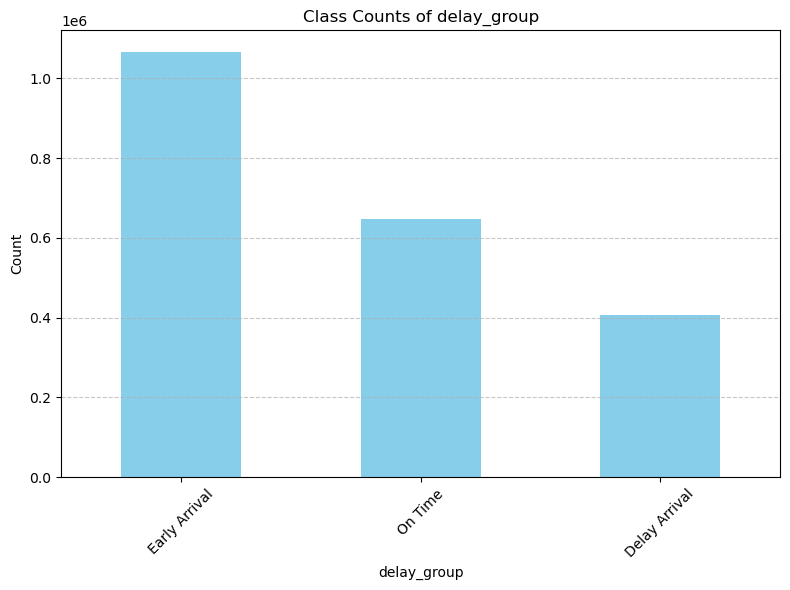

In [139]:
class_counts = df_req['delay_group'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Counts of delay_group')
plt.xlabel('delay_group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [140]:
#label encoding for quantity
Le = LabelEncoder()
df_req['delay_group'] = Le.fit_transform(df_req['delay_group'])

In [141]:
#display the dataframe
df_req.head()

,year,month,dayofmonth,dot_id_marketing_airline,originairportid,destairportid,crsdeptime,deptime,depdelayminutes,depdelay,...,arr_min_temp,arr_max_temp,arr_sp_humid,arr_rel_humid,arr_precip,arr_wspeed_10m,arr_wdirection_10m,arr_wspeed_50m,arr_wdirection_50m,delay_group
1,2018,1,1,19790,11278,12478,900,949.0,49.0,49.0,...,-11.31,-6.06,1.65,94.31,0.03,0.70,326.44,1.05,326.62,0
2,2018,1,1,19790,13930,10397,1515,1509.0,0.0,-6.0,...,-7.10,-0.31,1.53,57.00,0.00,1.87,284.81,3.02,286.50,1
3,2018,1,6,19790,12264,12478,640,636.0,0.0,-4.0,...,-10.60,-8.61,1.53,93.75,0.17,2.52,293.75,3.39,294.00,1
4,2018,1,13,19790,12264,12478,640,637.0,0.0,-3.0,...,-2.82,10.01,5.13,87.88,30.52,4.45,254.56,5.02,255.25,0
5,2018,1,14,19790,12264,12478,640,635.0,0.0,-5.0,...,-6.64,-2.94,1.83,74.94,0.00,3.63,303.19,4.15,303.75,2


In [142]:
# Define the columns to drop
columns_to_drop = ['arrtime','arrdelayminutes','arrdelay','airtime','actualelapsedtime','crselapsedtime','dep_temp', 'dep_dew', 'dep_min_temp',
       'dep_max_temp', 'dep_sp_humid', 'dep_rel_humid', 'dep_precip',
       'dep_wspeed_10m', 'dep_wdirection_10m', 'dep_wspeed_50m',
       'dep_wdirection_50m']

# Drop the specified columns and filter data based on the year
train_data = df_req.drop(columns_to_drop, axis=1)[df_req['year'].isin([2018, 2019])]
test_data = df_req.drop(columns_to_drop, axis=1)[df_req['year'] == 2020]

# Separate features and target variable
X_train = train_data.drop(columns=['delay_group','year'], axis=1)
y_train = train_data['delay_group']

X_test = test_data.drop(columns=['delay_group','year'], axis=1)
y_test = test_data['delay_group']



In [143]:
#train dataset
X_train.head()

,month,dayofmonth,dot_id_marketing_airline,originairportid,destairportid,crsdeptime,deptime,depdelayminutes,depdelay,crsarrtime,...,arr_dew,arr_min_temp,arr_max_temp,arr_sp_humid,arr_rel_humid,arr_precip,arr_wspeed_10m,arr_wdirection_10m,arr_wspeed_50m,arr_wdirection_50m
1,1,1,19790,11278,12478,900,949.0,49.0,49.0,1023,...,-10.32,-11.31,-6.06,1.65,94.31,0.03,0.70,326.44,1.05,326.62
2,1,1,19790,13930,10397,1515,1509.0,0.0,-6.0,1822,...,-11.18,-7.10,-0.31,1.53,57.00,0.00,1.87,284.81,3.02,286.50
3,1,6,19790,12264,12478,640,636.0,0.0,-4.0,808,...,-11.14,-10.60,-8.61,1.53,93.75,0.17,2.52,293.75,3.39,294.00
4,1,13,19790,12264,12478,640,637.0,0.0,-3.0,808,...,2.69,-2.82,10.01,5.13,87.88,30.52,4.45,254.56,5.02,255.25
5,1,14,19790,12264,12478,640,635.0,0.0,-5.0,810,...,-8.92,-6.64,-2.94,1.83,74.94,0.00,3.63,303.19,4.15,303.75


In [144]:
#test dataset
X_test.head()

,month,dayofmonth,dot_id_marketing_airline,originairportid,destairportid,crsdeptime,deptime,depdelayminutes,depdelay,crsarrtime,...,arr_dew,arr_min_temp,arr_max_temp,arr_sp_humid,arr_rel_humid,arr_precip,arr_wspeed_10m,arr_wdirection_10m,arr_wspeed_50m,arr_wdirection_50m
1673758,9,5,19805,10397,11057,1055,1052.0,0.0,-3.0,1214,...,17.48,21.65,29.05,12.88,65.50,0.04,3.62,116.06,4.96,116.69
1673759,9,5,19805,11057,10397,910,906.0,0.0,-4.0,1025,...,18.04,20.21,32.00,13.37,66.62,0.00,1.43,230.25,2.59,216.12
1673760,9,1,19805,10397,11278,1652,1645.0,0.0,-7.0,1845,...,19.73,18.93,26.58,14.34,87.00,4.34,2.05,117.50,3.02,118.50
1673761,9,2,19805,10397,11278,1652,1647.0,0.0,-5.0,1845,...,22.69,21.78,29.48,17.27,88.38,4.96,2.67,161.81,1.70,163.25
1673762,9,3,19805,10397,11278,1652,1646.0,0.0,-6.0,1845,...,23.08,22.24,30.55,17.76,83.94,7.31,3.66,229.81,5.82,217.81


In [145]:
df_req.to_csv('imbalanced_modelling_data.csv')

## 1. Decision tree

In [146]:
# Initializing the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42,criterion='entropy')

# Training the model on the training data
tree_model.fit(X_train, y_train)

# Predicting on the test data
y_pred = tree_model.predict(X_test)

In [147]:
# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Compute precision score
precision = precision_score(y_test, y_pred, average='weighted') 

# Compute recall score
recall = recall_score(y_test, y_pred, average='weighted')  

# Compute F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')  

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.565719578713678
Precision: 0.5918313664884085
Recall: 0.565719578713678
F1-Score: 0.5753611831812625
Confusion Matrix:
 [[ 34094   9828  12039]
 [ 22036 213489  99285]
 [ 17842  70580  54126]]


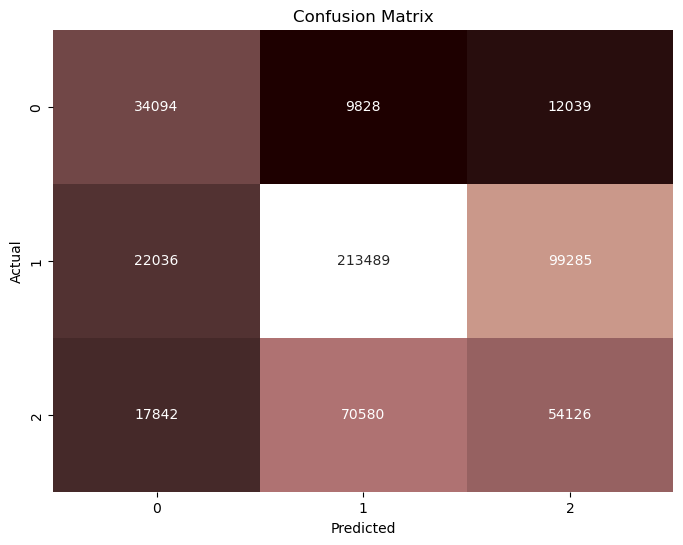

In [148]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Decision tree with Hyperparameter tuning

In [93]:
# Initializing the Decision Tree Regressor
tree_model_1 = DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth=13)

# Training the model on the training data
tree_model_1.fit(X_train, y_train)

# Predicting on the test data
y_pred_1 = tree_model_1.predict(X_test)

In [94]:
# Compute accuracy score
accuracy_1 = accuracy_score(y_test, y_pred_1)

# Compute precision score
precision_1 = precision_score(y_test, y_pred_1, average='weighted') 

# Compute recall score
recall_1 = recall_score(y_test, y_pred_1, average='weighted')  

# Compute F1-Score
f1_1 = f1_score(y_test, y_pred_1, average='weighted')  

# Compute Confusion Matrix
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)

# Print the evaluation metrics
print("Accuracy:", accuracy_1)
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1-Score:", f1_1)
print("Confusion Matrix:\n", conf_matrix_1)

Accuracy: 0.7029395164995059
Precision: 0.677220631771074
Recall: 0.7029395164995059
F1-Score: 0.6758923438595364
Confusion Matrix:
 [[ 33214  12385  10362]
 [  1020 301428  32362]
 [  6472  95827  40249]]


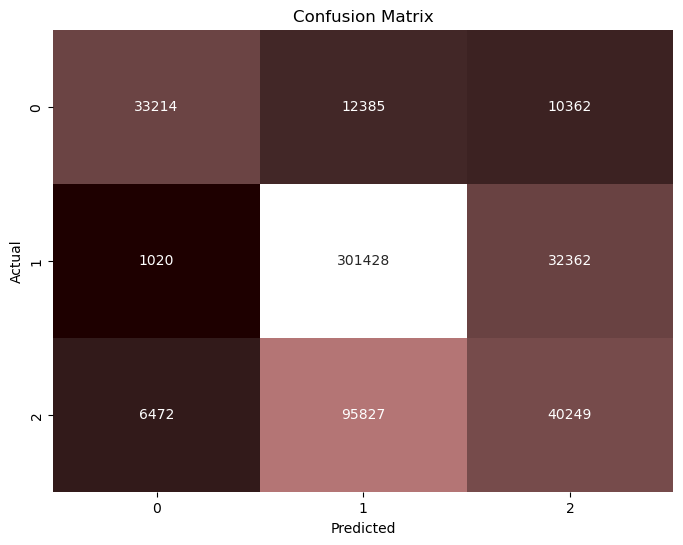

In [95]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 2. Naive Bayes Classifier

In [97]:
# Initializing and training the Naive Bayes classifier
nb_multi_model = GaussianNB()
nb_multi_model.fit(X_train, y_train)

# Predicting on the test data
y_pred_3 = nb_multi_model.predict(X_test)

In [98]:
# Compute accuracy score
accuracy_3 = accuracy_score(y_test, y_pred_3)

# Compute precision score
precision_3 = precision_score(y_test, y_pred_3, average='weighted') 

# Compute recall score
recall_3 = recall_score(y_test, y_pred_3, average='weighted')  

# Compute F1-Score
f1_3 = f1_score(y_test, y_pred_3, average='weighted')  

# Compute Confusion Matrix
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)

# Print the evaluation metrics
print("Accuracy:", accuracy_3)
print("Precision:", precision_3)
print("Recall:", recall_3)
print("F1-Score:", f1_3)
print("Confusion Matrix:\n", conf_matrix_3)

Accuracy: 0.7056320888623882
Precision: 0.6743266996134919
Recall: 0.7056320888623882
F1-Score: 0.6565755391111854
Confusion Matrix:
 [[ 32552  14344   9065]
 [  2591 317391  14828]
 [  5860 110304  26384]]


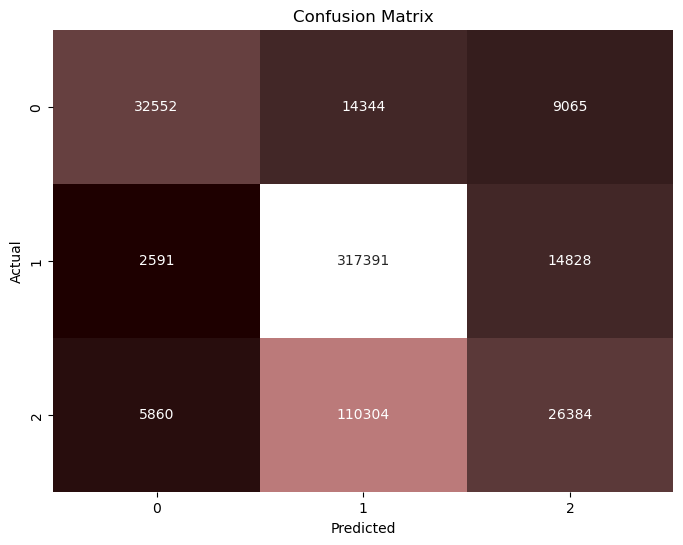

In [99]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_3, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 3. XG Boost with Hyperparameters

In [100]:
import xgboost as xgb

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42, learning_rate=0.01, n_estimators=300)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_4 = xgb_classifier.predict(X_test)


In [103]:
# Compute accuracy score
accuracy_4 = accuracy_score(y_test, y_pred_4)

# Compute precision score
precision_4 = precision_score(y_test, y_pred_4, average='weighted') 

# Compute recall score
recall_4 = recall_score(y_test, y_pred_4, average='weighted')  

# Compute F1-Score
f1_4 = f1_score(y_test, y_pred_4, average='weighted')  

# Compute Confusion Matrix
conf_matrix_4 = confusion_matrix(y_test, y_pred_4)

# Print the evaluation metrics
print("Accuracy:", accuracy_4)
print("Precision:", precision_4)
print("Recall:", recall_4)
print("F1-Score:", f1_4)
print("Confusion Matrix:\n", conf_matrix_4)

Accuracy: 0.7126935286385822
Precision: 0.6871821126267097
Recall: 0.7126935286385822
F1-Score: 0.6789937538613496
Confusion Matrix:
 [[ 33410  12912   9639]
 [   632 309902  24276]
 [  5836  99931  36781]]


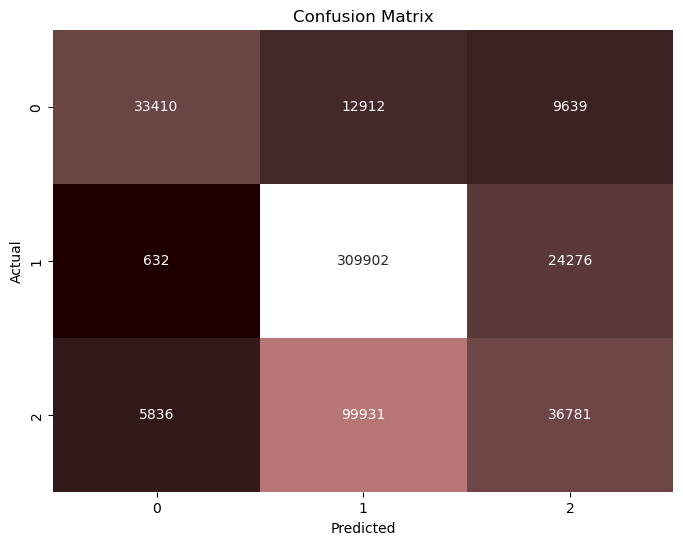

In [104]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_4, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 4.Logistic Regression

In [105]:
#logistic regression
model = LogisticRegression(random_state=42)

#train the model
model.fit(X_train, y_train)

#predictions on test data
y_pred_5 = model.predict(X_test)


In [106]:
# Compute accuracy score
accuracy_5 = accuracy_score(y_test, y_pred_5)

# Compute precision score
precision_5 = precision_score(y_test, y_pred_5, average='weighted') 

# Compute recall score
recall_5 = recall_score(y_test, y_pred_5, average='weighted')  

# Compute F1-Score
f1_5 = f1_score(y_test, y_pred_5, average='weighted')  

# Compute Confusion Matrix
conf_matrix_5 = confusion_matrix(y_test, y_pred_5)

# Print the evaluation metrics
print("Accuracy:", accuracy_5)
print("Precision:", precision_5)
print("Recall:", recall_5)
print("F1-Score:", f1_5)
print("Confusion Matrix:\n", conf_matrix_5)

Accuracy: 0.6567401498915283
Precision: 0.5972224742991239
Recall: 0.6567401498915283
F1-Score: 0.6021342062618477
Confusion Matrix:
 [[ 32416  20551   2994]
 [   720 302258  31832]
 [  5907 121063  15578]]


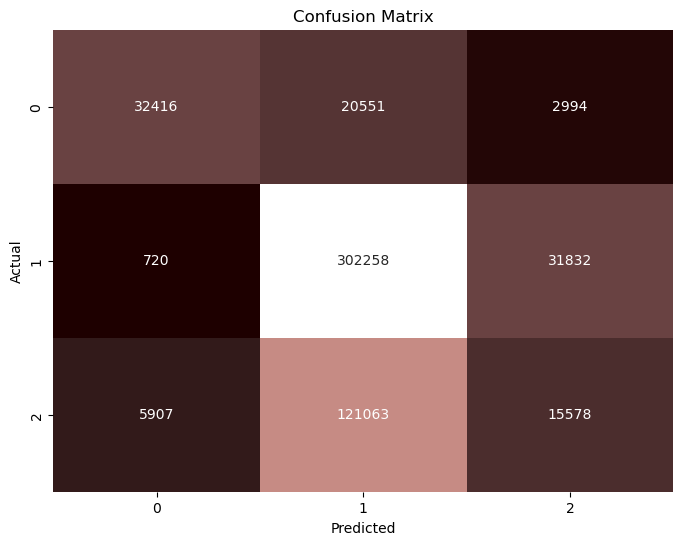

In [107]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_5, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 5. Random forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)

rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute precision score
precision = precision_score(y_test, y_pred, average='weighted') 

# Compute recall score
recall = recall_score(y_test, y_pred, average='weighted')  

# Compute F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')  

# Compute Confusion Matrix
conf_matrix_r = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix_r)

Accuracy: 0.7067064927369923
Accuracy: 0.7067064927369923
Precision: 0.6826176227522217
Recall: 0.7067064927369923
F1-Score: 0.6806715693856754
Confusion Matrix:
 [[ 33577  12179  10205]
 [   745 301737  32328]
 [  6176  94786  41586]]


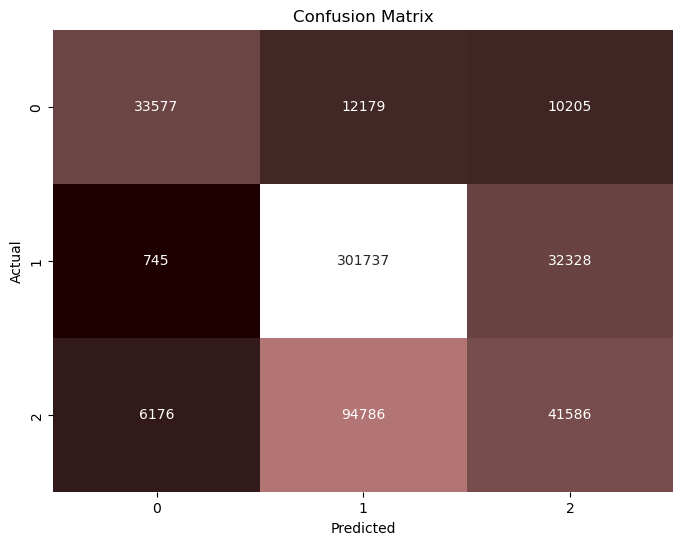

In [124]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_r, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 6.Feed forward Neural network

In [20]:
# pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the number of classes
num_classes = 3  
num_features = X_train.shape[1]

# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(num_features,)),  # Input layer with 64 neurons
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    layers.Dense(num_classes, activation='softmax')  # Output layer with num_classes neurons for multiclass classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('\nTest Accuracy:', test_accuracy)



Epoch 1/20
39741/39741 ━━━━━━━━━━━━━━━━━━━━ 15s 355us/step - accuracy: 0.5198 - loss: 8.9312 - val_accuracy: 0.6226 - val_loss: 0.8086
Epoch 2/20
39741/39741 ━━━━━━━━━━━━━━━━━━━━ 14s 359us/step - accuracy: 0.6141 - loss: 0.8135 - val_accuracy: 0.6557 - val_loss: 0.7456
Epoch 3/20
39741/39741 ━━━━━━━━━━━━━━━━━━━━ 14s 351us/step - accuracy: 0.6425 - loss: 0.7616 - val_accuracy: 0.6490 - val_loss: 0.7561
Epoch 4/20
39741/39741 ━━━━━━━━━━━━━━━━━━━━ 14s 360us/step - accuracy: 0.6486 - loss: 0.7509 - val_accuracy: 0.6555 - val_loss: 0.7416
Epoch 5/20
39741/39741 ━━━━━━━━━━━━━━━━━━━━ 15s 365us/step - accuracy: 0.6490 - loss: 0.7502 - val_accuracy: 0.6527 - val_loss: 0.7494
Epoch 6/20
39741/39741 ━━━━━━━━━━━━━━━━━━━━ 14s 359us/step - accuracy: 0.6330 - loss: 0.7782 - val_accuracy: 0.6486 - val_loss: 0.7579
Epoch 7/20
39741/39741 ━━━━━━━━━━━━━━━━━━━━ 15s 369us/step - accuracy: 0.6442 - loss: 0.7599 - val_accuracy: 0.6522 - val_loss: 0.7468
Epoch 8/20
39741/39741 ━━━━━━━━━━━━━━━━━━━━ 14s 359us/s

## Handle Class imbalance

In [108]:
#sample is_delay_group=2
df_delay_2 = df_req[df_req['delay_group'] == 2].sample(n=648452, random_state=42)

#sample is_delay_group=0
df_delay_0 = df_req[df_req['delay_group'] == 0].sample(n=407369, random_state=42)

#sample is_delay_group=1
df_delay_1 = df_req[df_req['delay_group'] == 1].sample(n=900000, random_state=42)

#combine the samples
df_sampled = pd.concat([df_delay_2, df_delay_0, df_delay_1])

#shuffle the samples
df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

#find its shape
print(df_sampled.shape)

(1955821, 41)


In [109]:
# Define the columns to drop
columns_to_drop = ['arrtime','arrdelayminutes','arrdelay','airtime','actualelapsedtime','crselapsedtime','dep_temp', 'dep_dew', 'dep_min_temp',
       'dep_max_temp', 'dep_sp_humid', 'dep_rel_humid', 'dep_precip',
       'dep_wspeed_10m', 'dep_wdirection_10m', 'dep_wspeed_50m',
       'dep_wdirection_50m']

# Drop the specified columns and filter data based on the year
train_data_sample = df_sampled.drop(columns_to_drop, axis=1)[df_sampled['year'].isin([2018, 2019])]
test_data_sample = df_sampled.drop(columns_to_drop, axis=1)[df_sampled['year'] == 2020]

# Separate features and target variable
X_train_sample = train_data_sample.drop(columns=['delay_group','year'], axis=1)
y_train_sample = train_data_sample['delay_group']

X_test_sample= test_data_sample.drop(columns=['delay_group','year'], axis=1)
y_test_sample = test_data_sample['delay_group']

In [110]:
#smote techniques
smote = SMOTE(random_state=42)

#apply smote to train data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sample, y_train_sample)

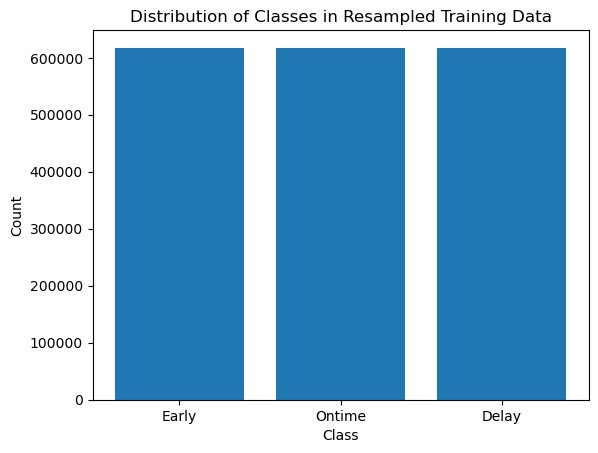

In [111]:
#count the occurence
delay_class_count = np.sum(y_train_resampled == 0)
early_class_count = np.sum(y_train_resampled == 1)
ontime_class_count = np.sum(y_train_resampled == 2)

#create a bar plot
plt.bar(['Early', 'Ontime', 'Delay'], [early_class_count, ontime_class_count, delay_class_count])

#add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Resampled Training Data')

#display the plot
plt.show()

In [112]:
df_sampled.to_csv('balanced_modelling_data.csv')

## Decision tree handling class imbalance

In [113]:
# Initializing the Decision Tree Regressor
tree_model_resample = DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth=12)

# Training the model on the training data
tree_model_resample.fit(X_train_resampled, y_train_resampled)

# Predicting on the test data
y_pred_resample = tree_model_resample.predict(X_test)

In [114]:
# Compute accuracy score
accuracy_6 = accuracy_score(y_test, y_pred_resample)

# Compute precision score
precision_6 = precision_score(y_test, y_pred_resample, average='weighted') 

# Compute recall score
recall_6 = recall_score(y_test, y_pred_resample, average='weighted')  

# Compute F1-Score
f1_6 = f1_score(y_test, y_pred_resample, average='weighted')  

# Compute Confusion Matrix
conf_matrix_6 = confusion_matrix(y_test, y_pred_resample)

# Print the evaluation metrics
print("Accuracy:", accuracy_6)
print("Precision:", precision_6)
print("Recall:", recall_6)
print("F1-Score:", f1_6)
print("Confusion Matrix:\n", conf_matrix_6)

Accuracy: 0.6921842274511127
Precision: 0.6743601317078897
Recall: 0.6921842274511127
F1-Score: 0.6783003522962692
Confusion Matrix:
 [[ 34522  10437  11002]
 [  1270 285087  48453]
 [  8286  84716  49546]]


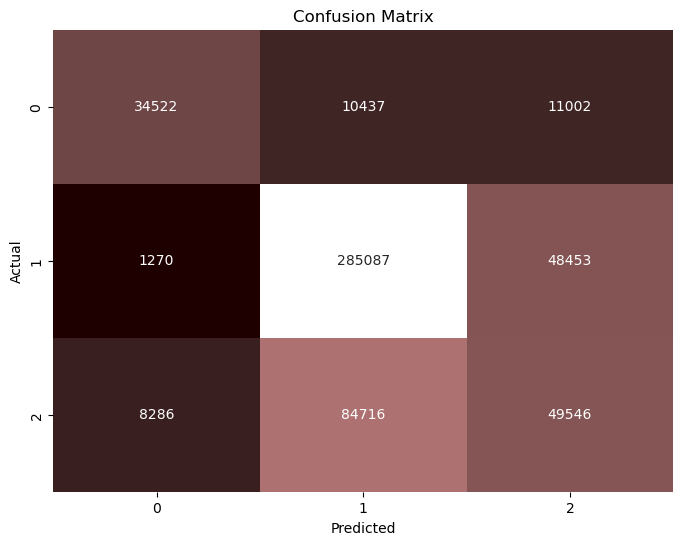

In [115]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_6, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## XG Boost handling class imbalance

In [116]:
# Define the XGBoost classifier
xgb_classifier_sample = xgb.XGBClassifier(objective='binary:logistic', random_state=42, learning_rate=0.01, n_estimators=300)

# Train the classifier
xgb_classifier_sample.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_4_sample = xgb_classifier_sample.predict(X_test)

In [117]:
# Compute accuracy score
accuracy_4_sample = accuracy_score(y_test, y_pred_4_sample)

# Compute precision score
precision_4_sample = precision_score(y_test, y_pred_4_sample, average='weighted') 

# Compute recall score
recall_4_sample = recall_score(y_test, y_pred_4_sample, average='weighted')  

# Compute F1-Score
f1_4_sample = f1_score(y_test, y_pred_4_sample, average='weighted')  

# Compute Confusion Matrix
conf_matrix_4_sample = confusion_matrix(y_test, y_pred_4_sample)

# Print the evaluation metrics
print("Accuracy:", accuracy_4_sample)
print("Precision:", precision_4_sample)
print("Recall:", recall_4_sample)
print("F1-Score:", f1_4_sample)
print("Confusion Matrix:\n", conf_matrix_4_sample)

Accuracy: 0.6948317986045875
Precision: 0.6746440699174705
Recall: 0.6948317986045875
F1-Score: 0.679082512120567
Confusion Matrix:
 [[ 35293  10631  10037]
 [  1470 287208  46132]
 [  8833  85649  48066]]


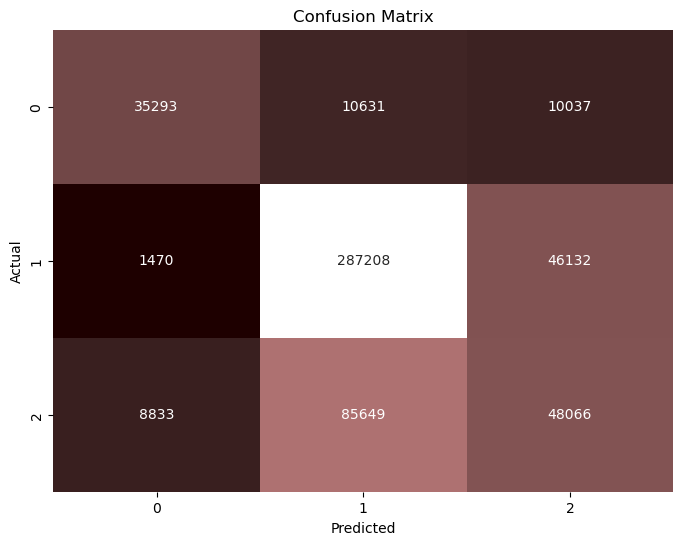

In [118]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_4_sample, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Naive Bayes handling class imbalance

In [119]:
# Initializing and training the Naive Bayes classifier
nb_multi_model_sample = GaussianNB()
nb_multi_model_sample.fit(X_train_resampled, y_train_resampled)

# Predicting on the test data
y_pred_3_sample = nb_multi_model_sample.predict(X_test)

In [120]:
# Compute accuracy score
accuracy_3_sample = accuracy_score(y_test, y_pred_3_sample)

# Compute precision score
precision_3_sample = precision_score(y_test, y_pred_3_sample, average='weighted') 

# Compute recall score
recall_3_sample = recall_score(y_test, y_pred_3_sample, average='weighted')  

# Compute F1-Score
f1_3_sample = f1_score(y_test, y_pred_3_sample, average='weighted')  

# Compute Confusion Matrix
conf_matrix_3_sample = confusion_matrix(y_test, y_pred_3_sample)

# Print the evaluation metrics
print("Accuracy:", accuracy_3_sample)
print("Precision:", precision_3_sample)
print("Recall:", recall_3_sample)
print("F1-Score:", f1_3_sample)
print("Confusion Matrix:\n", conf_matrix_3_sample)

Accuracy: 0.7048520678993248
Precision: 0.6724131421781677
Recall: 0.7048520678993248
F1-Score: 0.6581976391169543
Confusion Matrix:
 [[ 33189  13982   8790]
 [  2796 315217  16797]
 [  6606 108437  27505]]


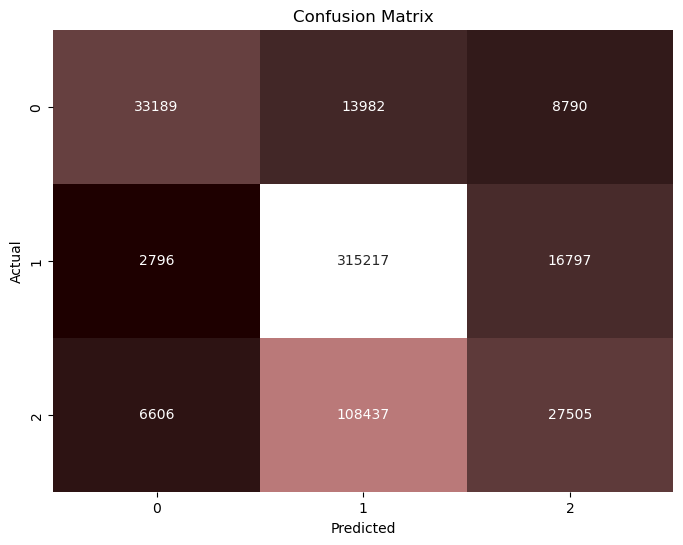

In [121]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_3_sample, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression handling class imbalance

In [122]:
#logistic regression
model_sample = LogisticRegression(random_state=42)

#train the model
model_sample.fit(X_train_resampled, y_train_resampled)

#predictions on test data
y_pred_5_sample = model_sample.predict(X_test)

In [66]:
# Compute accuracy score
accuracy_5_sample = accuracy_score(y_test, y_pred_5_sample)

# Compute precision score
precision_5_sample = precision_score(y_test, y_pred_5_sample, average='weighted') 

# Compute recall score
recall_5_sample = recall_score(y_test, y_pred_5_sample, average='weighted')  

# Compute F1-Score
f1_5_sample = f1_score(y_test, y_pred_5_sample, average='weighted')  

# Compute Confusion Matrix
conf_matrix_5_sample = confusion_matrix(y_test, y_pred_5_sample)

# Print the evaluation metrics
print("Accuracy:", accuracy_5_sample)
print("Precision:", precision_5_sample)
print("Recall:", recall_5_sample)
print("F1-Score:", f1_5_sample)
print("Confusion Matrix:\n", conf_matrix_5_sample)

Accuracy: 0.5160907449387703
Precision: 0.5878113330781125
Recall: 0.5160907449387703
F1-Score: 0.5372016734751139
Confusion Matrix:
 [[ 36555   9796   9610]
 [  3704 172980 158126]
 [ 13502  63340  65706]]


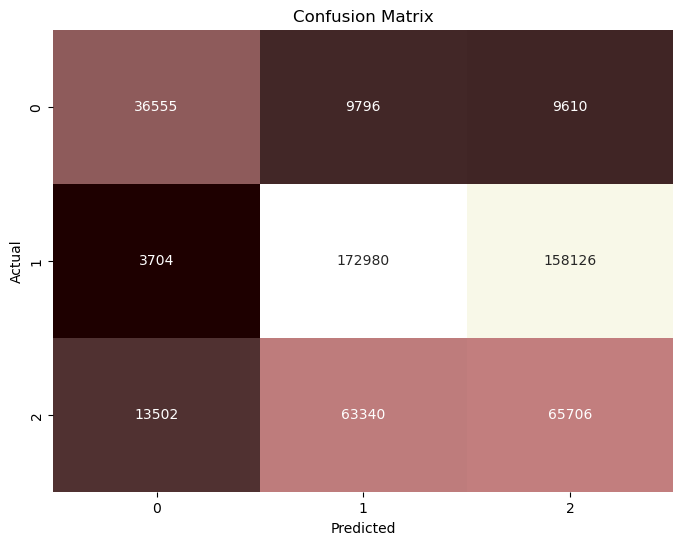

In [149]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_5_sample, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()